In [43]:
#Micro Credit Defaulter Model. It is a classification problem

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
import scipy
from scipy import stats
from scipy.stats import zscore
warnings.filterwarnings("ignore")
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


In [45]:
#lets read the csv file
df=pd.read_csv("Microcredit.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [46]:
#lets convert the csv file to a dataframe

In [47]:
Microcredit=pd.DataFrame(data=df)
Microcredit

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [48]:
Microcredit.drop(["Unnamed: 0"],axis=1,inplace=True)

In [49]:
Microcredit.index.set_names("Sr.No",inplace=True)

In [50]:
Microcredit

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
Sr.No,,,,,,,,,,,,,,,,,,,,,
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016


In [51]:
Microcredit.shape
#it has 209593 rows and 36 columns

(209593, 36)

In [52]:
Microcredit.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [53]:
Microcredit.drop(["msisdn","pcircle"],axis=1,inplace=True)

In [54]:
Microcredit.head(3453)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
Sr.No,,,,,,,,,,,,,,,,,,,,,
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20-07-2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10-08-2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19-08-2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06-06-2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,1,316.0,52.540000,52.540000,599.70,599.70,1.0,0.0,770,6,...,6,6.0,0.0,1.0,6,6,0.0,12.500000,12.500000,30-06-2016
3449,0,133.0,5.166667,5.166667,20.00,20.00,2.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,10-06-2016
3450,1,211.0,900.000000,900.000000,99.56,99.56,1.0,0.0,770,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,17-08-2016


In [55]:
MC1=Microcredit.aon.abs()

In [56]:
MC1.head(3453)

Sr.No
0       272.0
1       712.0
2       535.0
3       241.0
4       947.0
        ...  
3448    316.0
3449    133.0
3450    211.0
3451     48.0
3452    186.0
Name: aon, Length: 3453, dtype: float64

In [57]:
Microcredit.drop("aon",axis=1,inplace=True)

In [58]:
MC2=pd.concat([Microcredit,MC1],axis=1)

In [59]:
MC2.head(3453)

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,aon
Sr.No,,,,,,,,,,,,,,,,,,,,,
0,0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20-07-2016,272.0
1,1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10-08-2016,712.0
2,1,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19-08-2016,535.0
3,1,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06-06-2016,241.0
4,1,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22-06-2016,947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,1,52.540000,52.540000,599.70,599.70,1.0,0.0,770,6,2.0,...,6.0,0.0,1.0,6,6,0.0,12.500000,12.500000,30-06-2016,316.0
3449,0,5.166667,5.166667,20.00,20.00,2.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,10-06-2016,133.0
3450,1,900.000000,900.000000,99.56,99.56,1.0,0.0,770,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,17-08-2016,211.0


In [60]:
MC2.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate', 'aon'],
      dtype='object')

In [61]:
MC2["pdate"]=pd.to_datetime(MC2["pdate"])

In [62]:
MC2["month"]=MC2["pdate"].dt.month
MC2["day"]=MC2["pdate"].dt.day

In [63]:
MC2.drop(["pdate","rental30","rental90","fr_ma_rech30","fr_ma_rech90"],axis=1,inplace=True)

In [64]:
MC2.describe()
#Data is widespread from the mean in quite some columns
#Outliers may be present but we shall ignore them as removal of outliers causes data loss which more than the desired data loss.
#Skewness is present in the attributes as the difference between mean and median is present.

,label,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,aon,month,day
count,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,5381.402289,6082.515068,3755.84780,3712.202921,2064.452797,3.978057,7704.501157,1812.817952,3851.927942,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,8112.808718,6.612253,14.584008
std,0.330519,9220.623400,10918.812767,53905.89223,53374.833430,2370.786034,4.256090,10139.621714,2070.864620,54006.374433,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,75696.032666,2.371940,7.953396
min,0.000000,-93.012667,-93.012667,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000
25%,1.000000,42.440000,42.692000,1.00000,0.000000,770.000000,1.000000,1540.000000,770.000000,11.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,246.000000,6.000000,7.000000
50%,1.000000,1469.175667,1500.000000,3.00000,0.000000,1539.000000,3.000000,4628.000000,1539.000000,33.900000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,527.000000,7.000000,14.000000
75%,1.000000,7244.000000,7802.790000,7.00000,0.000000,2309.000000,5.000000,10010.000000,1924.000000,83.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,982.000000,8.000000,21.000000
max,1.000000,265926.000000,320630.000000,998650.37770,999171.809400,55000.000000,203.000000,810096.000000,55000.000000,999479.419300,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,999860.755200,12.000000,31.000000


In [65]:
#lets perform univariate analysis

In [66]:
MC2["aon"].head(3455)
#since age of cellular data cannot be negative, we take an absolute value assuming the negative sign was a mistake.

Sr.No
0       272.0
1       712.0
2       535.0
3       241.0
4       947.0
        ...  
3450    211.0
3451     48.0
3452    186.0
3453    372.0
3454    128.0
Name: aon, Length: 3455, dtype: float64

<AxesSubplot:xlabel='aon', ylabel='Density'>

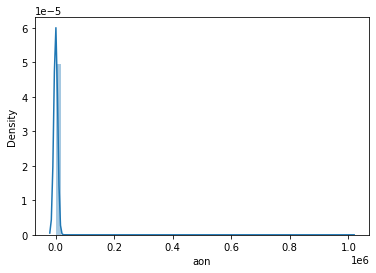

In [67]:
sns.distplot(MC2["aon"])

#skewness is present to the right

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

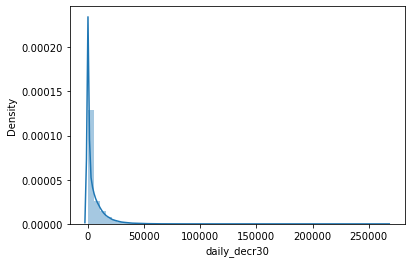

In [68]:
sns.distplot(MC2["daily_decr30"])
#skewness is present to the right

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

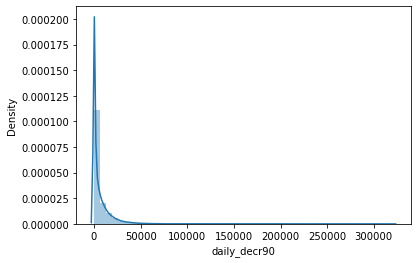

In [69]:
sns.distplot(MC2["daily_decr90"])
#skewness is present to the right

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

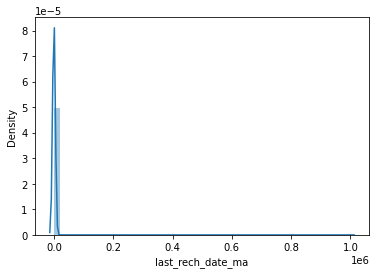

In [70]:
sns.distplot(MC2["last_rech_date_ma"])
#skewness is present to the right

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

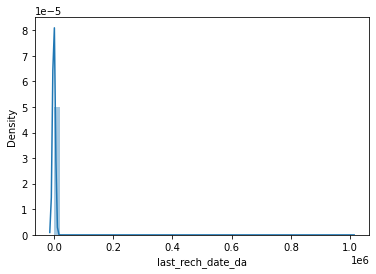

In [71]:
sns.distplot(MC2["last_rech_date_da"])
#skewness is present to the right

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

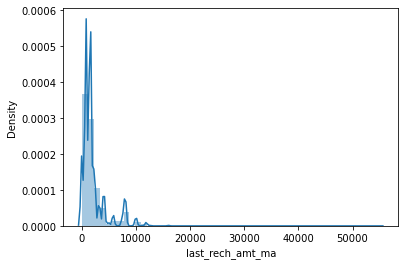

In [72]:
sns.distplot(MC2["last_rech_amt_ma"])
#skewness is present to the right

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

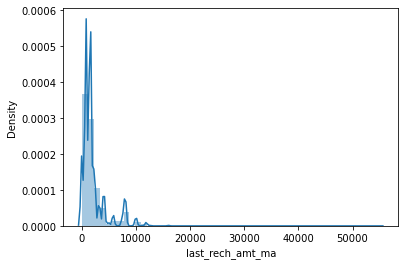

In [73]:
sns.distplot(MC2["last_rech_amt_ma"])
#skewness is present to the right

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

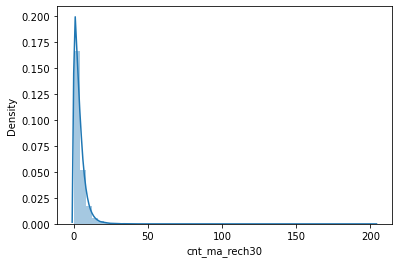

In [74]:
sns.distplot(MC2["cnt_ma_rech30"])
#skewness is present to the right

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

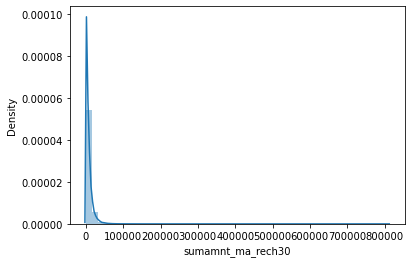

In [75]:

sns.distplot(MC2["sumamnt_ma_rech30"])
#skewness is present to the right

<AxesSubplot:xlabel='label', ylabel='count'>

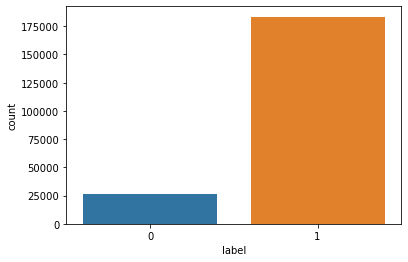

In [76]:
sns.countplot(MC2["label"])
#there see ms to be a huge difference between the target variables. Hence we shall use the f1 scoring for comparison while using the algorithm


In [77]:
x=MC2.drop("label",axis=1)

In [78]:
y=MC2["label"]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 30)
(62878, 30)
(146715,)
(62878,)


In [40]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#Lets predict the y values
pred1=lg.predict(x_test)
print(accuracy_score(pred1,y_test))
print(confusion_matrix(pred1,y_test))
print(classification_report(pred1,y_test))
score1=cross_val_score(lg,x,y,scoring="f1",cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.874121314291167
[[   13    27]
 [ 7888 54950]]
              precision    recall  f1-score   support

           0       0.00      0.33      0.00        40
           1       1.00      0.87      0.93     62838

    accuracy                           0.87     62878
   macro avg       0.50      0.60      0.47     62878
weighted avg       1.00      0.87      0.93     62878

[0.93342834 0.93343511 0.93339779 0.93342154 0.93331976]
0.9334005103476258
4.229031804286904e-05


In [82]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred2=rf.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(rf,x,y,scoring="f1",cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.9181907821495595
[[ 3978  1221]
 [ 3923 53756]]
              precision    recall  f1-score   support

           0       0.50      0.77      0.61      5199
           1       0.98      0.93      0.95     57679

    accuracy                           0.92     62878
   macro avg       0.74      0.85      0.78     62878
weighted avg       0.94      0.92      0.93     62878

[0.95567602 0.95441754 0.95479339 0.95540621 0.95454001]
0.9549666360808173
0.0004919311037559435


In [83]:
#random forest is the best fit method

In [84]:
parameters={"n_estimators":[100,10,120,50],"criterion":["gini","entropy"],"min_samples_leaf":[1,0.1,10,20],"bootstrap":[True,False],"random_state":[42,50,30,100]}
rsearch=RandomizedSearchCV(rf,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 0.1, 10, 20],
                                        'n_estimators': [100, 10, 120, 50],
                                        'random_state': [42, 50, 30, 100]})

In [85]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       min_samples_leaf=10, random_state=30)
{'random_state': 30, 'n_estimators': 100, 'min_samples_leaf': 10, 'criterion': 'entropy', 'bootstrap': False}
0.9204716627475037


In [86]:
#lets put these best parameters back into the randomforest model

rf1=RandomForestClassifier(random_state=30,n_estimators=100,min_samples_leaf=10,criterion="entropy",bootstrap=False)
rf1.fit(x_train,y_train)
#lets predict y values
pred3=rf1.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))

0.9203059893762524
[[ 3915  1025]
 [ 3986 53952]]
              precision    recall  f1-score   support

           0       0.50      0.79      0.61      4940
           1       0.98      0.93      0.96     57938

    accuracy                           0.92     62878
   macro avg       0.74      0.86      0.78     62878
weighted avg       0.94      0.92      0.93     62878



In [88]:
import joblib
#lets dump the model for further use
joblib.dump(rf1,"rf1.objfile")

['rf1.objfile']